In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio

from rasterio.mask import mask
from shapely.geometry import mapping

from acled_country_analysis import analysis

import pandas as pd

# Population and Relative Wealth Index in Lebanon

The last census been conducted in Lebanon is in [1932](https://www.thenation.com/article/archive/lebanon-census/). This was before Lebanon declared independence from France. To circumvent this, we attempt to use algorithmically generated data such as that released by [Meta](https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps). 

In [2]:
LEBANON_ADM3 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm3_cdr_20200810.shp')
LEBANON_ADM4 = gpd.read_file('../../data/shapefiles/lbn_beirut_adm4_mapaction_pcoded/lbn_beirut_adm4_MapAction_Pcoded.shp')
LEBANON_ADM0 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm0_cdr_20200810.shp')

In [3]:
LEBANON_ADM1 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm1_cdr_20200810.shp')
LEBANON_ADM2 = gpd.read_file('../../data/shapefiles/lbn_adm_cdr_20200810/lbn_admbnda_adm2_cdr_20200810.shp')

In [6]:
hrsl = pd.read_csv('../../data/population/2023/population_lat_30_lon_30.csv')
lebanon_bbox = (35.1260526873, 33.0890400254, 36.6117501157, 34.6449140488)
hrsl = hrsl[(hrsl['longitude']>35.1260526873)&(hrsl['longitude']<36.6117501157)&(hrsl['latitude']>33.0890400254)&(hrsl['latitude']<34.6449140488)]

In [16]:
hrsl = analysis.convert_to_gdf(hrsl)

In [17]:
hrsl_lebanon0 = LEBANON_ADM0.sjoin(hrsl)
hrsl_lebanon1 = LEBANON_ADM1.sjoin(hrsl)

In [28]:
hrsl_lebanon0 = LEBANON_ADM0.sjoin(hrsl)
hrsl_lebanon0 = hrsl_lebanon0.groupby(['admin0Name']).sum()

hrsl_lebanon3 = LEBANON_ADM3.sjoin(hrsl)

In [33]:
hrsl_lebanon3 = hrsl_lebanon3.groupby(['admin0Name', 'admin1Name', 'admin2Name','admin3Name']).sum().reset_index()[['admin0Name', 'admin1Name', 'admin3Name', 'population']]
hrsl_lebanon3 = hrsl_lebanon3.merge(LEBANON_ADM3[['admin0Name', 'admin1Name', 'admin3Name', 'geometry']], on = ['admin0Name', 'admin1Name', 'admin3Name'])

hrsl_lebanon3 = gpd.GeoDataFrame(hrsl_lebanon3, crs="EPSG:4326", geometry='geometry')

<Axes: >

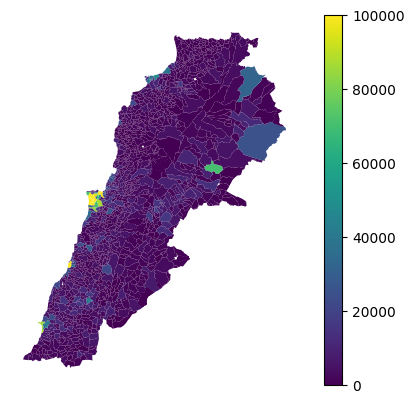

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.axis('off')
hrsl_lebanon3.plot(column='population', cmap='viridis',vmax = 100000, legend = True, ax=ax)

### Observations

* The area around Beirut is way more populated than the rest of the country

## UNHCR Refugee Population Trend

In [55]:
refugee_annual = pd.read_csv('../../data/query_data/population.csv', skiprows=14)

<Axes: xlabel='Year'>

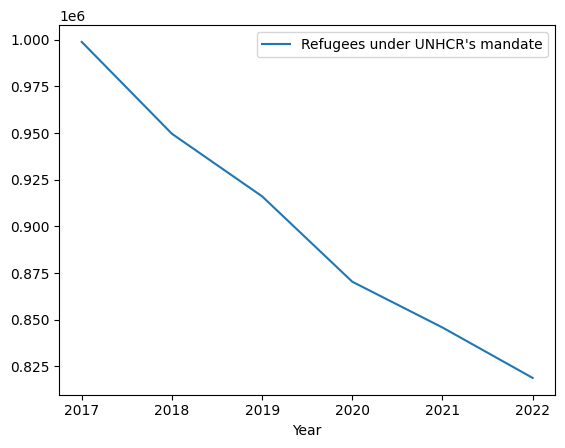

In [68]:
refugee_annual[refugee_annual['Country of asylum']=='Lebanon'][["Refugees under UNHCR's mandate", "Year"]].sort_values(by='Year').set_index('Year').plot()

## Relative Wealth Index

In [72]:
rw = pd.read_csv('../../data/LBN_relative_wealth_index.csv')
rw = analysis.convert_to_gdf(rw)

<Axes: >

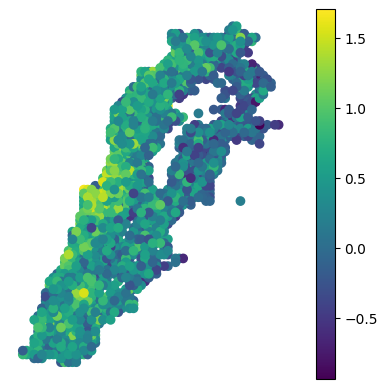

In [80]:
fig, ax = plt.subplots()
plt.axis('off')
rw.plot(column = 'rwi', legend = True, ax=ax)

### Observations

* The northern border shared with Syria is some of the poorest region in the country